In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

%matplotlib inline

/home/michael/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv('train.csv')

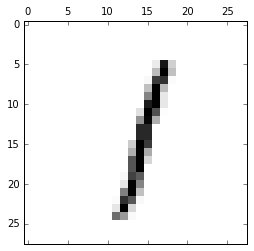

In [18]:
images = df[df.columns[1:]]
given_label = df['label']

#to visualize, reshape it as a 28x28 box
boximages = np.array(images).reshape(42000,28,28)
plt.matshow(boximages[15],cmap=plt.cm.Greys)

# Pre-Processing: Conceptualizing

In [148]:
from skimage.measure import regionprops, label
from skimage.filters import threshold_otsu
from skimage.transform import resize, AffineTransform
import skimage.transform as tf

In [149]:
# http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.estimate_transform
# Find the points of your image

tform = tf.estimate_transform('similarity',)

TypeError: estimate_transform() takes exactly 3 arguments (1 given)

In [147]:
boximages[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [57]:
thresh = threshold_otsu(boximages[10])
binary = boximages[10] > thresh

In [58]:
regionprops(binary)[0].image

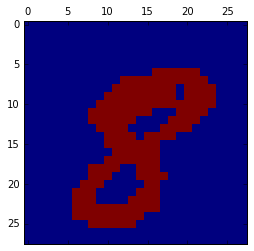

In [59]:
plt.matshow(binary.astype(int))

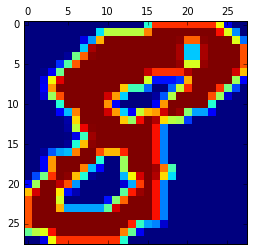

In [67]:
plt.matshow(resize(regionprops(label(binary.astype(int)))[0].image.astype(float),(28,28)))

# Pre-processing: All the data!

In [80]:
def preprocess(num):
    thresh = threshold_otsu(num)
    binary = num > thresh
    binary = binary.astype(int)
    return resize(regionprops(binary)[0].image.astype(float),(28,28))

#     Use this if you want more than one blob
#     return resize(regionprops(label(binary))[0].image.astype(float),(28,28))

In [101]:
resized = np.empty([42000,28,28])

In [103]:
for i, pic in enumerate(boximages):
    resized[i] = preprocess(pic)

In [112]:
resized.shape

(42000, 28, 28)

In [114]:
flatten = resized.reshape(42000,784)

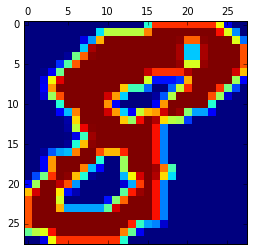

In [110]:
plt.matshow(resized[10])

# Fitting a Model: KNN

In [119]:
X_train, X_test, y_train, y_test = train_test_split(flatten,
                                                    given_label,
                                                    test_size = .1,random_state=4444)

In [120]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [121]:
y_fit = knn.predict(X_test)

In [122]:
accuracy_score(y_test,y_fit)

0.96999999999999997

# Visualizing Averages

In [125]:
average_ones = np.mean(boximages[np.array(given_label==1)], axis=0)

In [126]:
def plot_averages(data,actual):
    fig = plt.figure(figsize = (10,5))
    for i in range(10):
        plt.subplot(2,5,i+1).matshow(np.mean(data[np.array(actual==i)], axis=0),cmap=plt.cm.Greys)


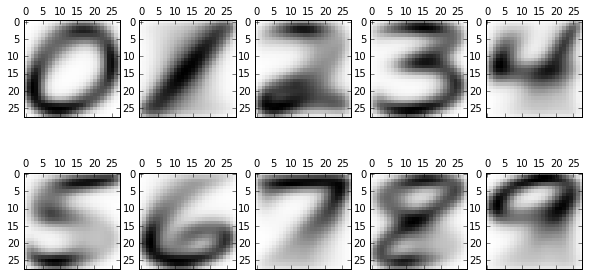

In [127]:
plot_averages(resized,given_label)

In [138]:
residual_index = [i for i, (val,valb) in enumerate(zip(y_test,y_fit)) if val!=valb]

In [128]:
residual = [val!=valb for i, (val,valb) in enumerate(zip(y_test,y_fit))]

In [129]:
residual = np.array(residual)

In [130]:
X_images = np.array(X_test).reshape(len(X_test),28,28)

In [131]:
X_residual = X_images[residual]

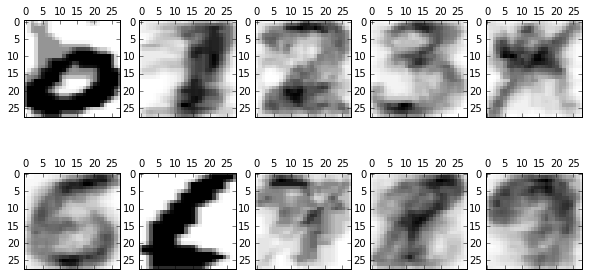

In [132]:
plot_averages(X_residual,y_test[residual])

In [ ]:
# plt.matshow(np.mean(X_residual[np.array(y_test[residual]==2)],axis=0),cmap=plt.cm.Greys)

In [133]:
def show_img(i):
    boximages = np.array(X_test).reshape(len(X_test),28,28)
    print 'Actual:', list(y_test)[i]
    print 'Predicted:', list(y_fit)[i]
    plt.matshow(boximages[i],cmap=plt.cm.Greys)

In [139]:
residual_index

[8,
 21,
 50,
 79,
 82,
 94,
 117,
 152,
 229,
 234,
 322,
 328,
 355,
 367,
 372,
 374,
 404,
 457,
 487,
 534,
 594,
 713,
 725,
 745,
 762,
 792,
 807,
 908,
 986,
 1008,
 1013,
 1069,
 1119,
 1165,
 1193,
 1331,
 1339,
 1373,
 1430,
 1482,
 1513,
 1519,
 1525,
 1528,
 1539,
 1554,
 1571,
 1667,
 1672,
 1733,
 1797,
 1860,
 1862,
 1867,
 1877,
 1913,
 1921,
 1939,
 1961,
 2012,
 2044,
 2049,
 2059,
 2066,
 2087,
 2092,
 2096,
 2193,
 2204,
 2215,
 2239,
 2250,
 2251,
 2341,
 2345,
 2364,
 2411,
 2510,
 2576,
 2578,
 2606,
 2613,
 2632,
 2713,
 2720,
 2812,
 2889,
 2914,
 2949,
 2978,
 3031,
 3067,
 3084,
 3096,
 3106,
 3122,
 3225,
 3243,
 3290,
 3351,
 3426,
 3433,
 3486,
 3498,
 3561,
 3583,
 3595,
 3629,
 3703,
 3748,
 3780,
 3801,
 3821,
 3841,
 3848,
 3875,
 3928,
 3952,
 3966,
 3986,
 4024,
 4027,
 4043,
 4096,
 4097,
 4127]

Actual: 5
Predicted: 6


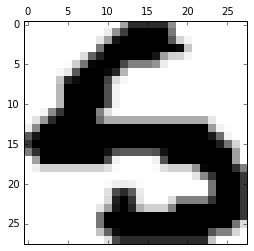

In [140]:
show_img(8)

In [141]:
confusion = np.zeros([10,10])
for i,j in zip(y_test,y_fit):
    confusion[i][j]+=1

In [142]:
print confusion

[[ 430.    0.    0.    0.    0.    0.    2.    0.    0.    0.]
 [   0.  451.    3.    1.    2.    0.    0.    2.    0.    0.]
 [   2.    3.  426.    0.    1.    0.    0.    6.    0.    0.]
 [   0.    2.    0.  451.    0.    6.    0.    2.    1.    0.]
 [   0.    5.    0.    0.  403.    0.    1.    1.    0.    4.]
 [   1.    4.    0.    7.    0.  366.   10.    0.    1.    0.]
 [   0.    1.    0.    0.    0.    0.  374.    0.    0.    0.]
 [   0.    3.    0.    0.    1.    0.    0.  425.    0.    2.]
 [   0.   13.    2.    5.    1.    3.    0.    1.  361.    4.]
 [   2.    2.    1.    1.    9.    1.    0.    6.    1.  387.]]


In [143]:
percentage = confusion/np.sum(confusion, axis=1)

In [144]:
for i in range(10):
    percentage[i][i] = 0

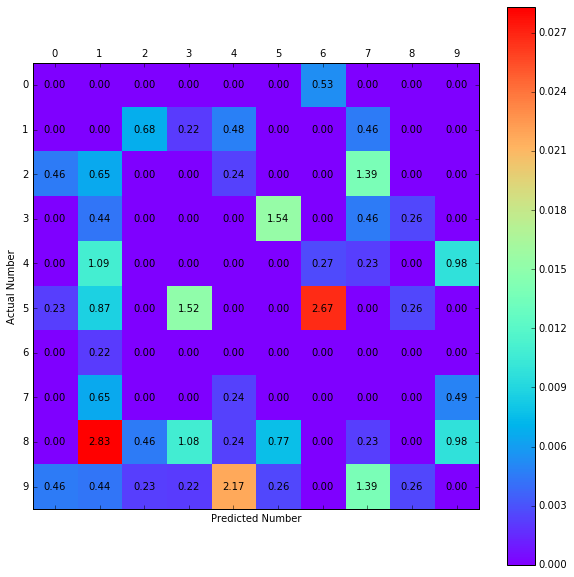

In [145]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,10))
# plt.figure()
c = ax.matshow(percentage,cmap=plt.cm.rainbow)
fig.colorbar(c)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel('Predicted Number')
plt.ylabel('Actual Number')

for (i, j), z in np.ndenumerate(percentage):
    ax.text(j, i, '{:0.2f}'.format(z*100), ha='center', va='center')

# Centering Calculations

In [ ]:
3<<2

In [ ]:
indices = np.arange(28)
X, Y = np.meshgrid(indices, indices)

In [ ]:
test = np.array(images)[0]

In [ ]:
np.sum(test.reshape(28,28) *X)/np.sum(test)

In [ ]:
np.sum(test.reshape(28,28) *Y)/np.sum(test)